In [59]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import researchpy as rp
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_clean.csv')

In [3]:
data

,produit,code,pnns_groups_1,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,Bonneterre : Chocolat Noir Costa Rica 75% De C...,3396410047559,Sugary snacks,556.0,44.0,27.000000,30.000000,24.000000,10.000000,0.030000,0.011811
1,Franprix : Dégustation Lait...,3263850583117,Sugary snacks,572.4,38.0,22.000000,50.000000,49.000000,7.600000,0.190000,0.074803
2,Gullon : Biscuits Petit-Déjeuner Céréales Comp...,8410376046991,Sugary snacks,413.2,14.0,1.300000,65.000000,1.400000,6.800000,0.650000,0.255906
3,Aurada : Galletas Tostadas...,24044011,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
4,SuperSol : Galletas Tostadas...,8430803027171,Sugary snacks,425.6,10.0,5.000000,77.000000,21.000000,6.900000,0.780000,0.307087
...,...,...,...,...,...,...,...,...,...,...,...
196925,Tartex : Pâté Shiitake...,4005514171303,Fruits and vegetables,214.7,17.9,4.747776,6.400000,16.594528,7.000000,1.267296,0.498952
196926,Gourmet Garden : Coriandre Gourmet Garden...,7520800065,Composite foods,10.0,0.3,4.747776,33.926208,16.594528,7.097417,0.127000,0.050000
196927,Nacional : Spaghetti classica...,5601066644471,Cereals and potatoes,348.2,1.8,0.400000,71.000000,5.000000,12.000000,0.010160,0.004000
196928,Maggi : Soupe de queue de boeuf (potage oxtail...,5601001001604,Fat and sauces,366.3,11.9,0.500000,51.800000,7.200000,13.000000,14.732000,5.800000


# Analyse univariée

## Variable qualitative 

In [4]:
data['pnns_groups_1'].value_counts()

Sugary snacks              42343
Cereals and potatoes       31234
Milk and dairy products    22935
Composite foods            20489
Beverages                  18117
Fruits and vegetables      16796
Fat and sauces             16072
Fish Meat Eggs             15156
Salty snacks               13788
Name: pnns_groups_1, dtype: int64

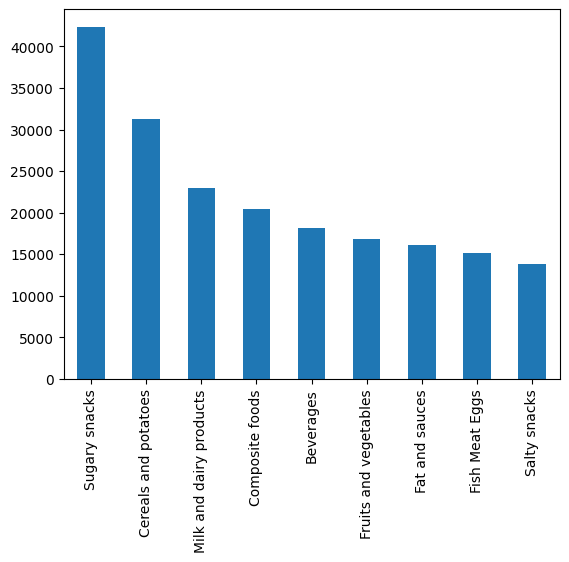

In [5]:
data['pnns_groups_1'].value_counts().plot.bar()
plt.show()

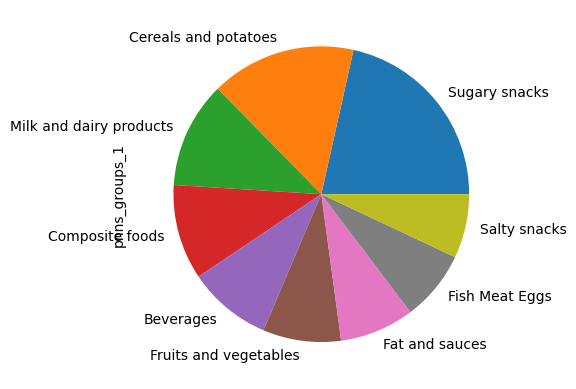

In [6]:
data['pnns_groups_1'].value_counts().plot.pie()
plt.show()

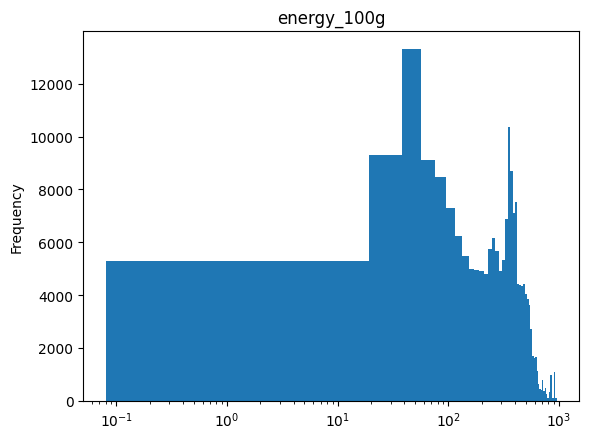

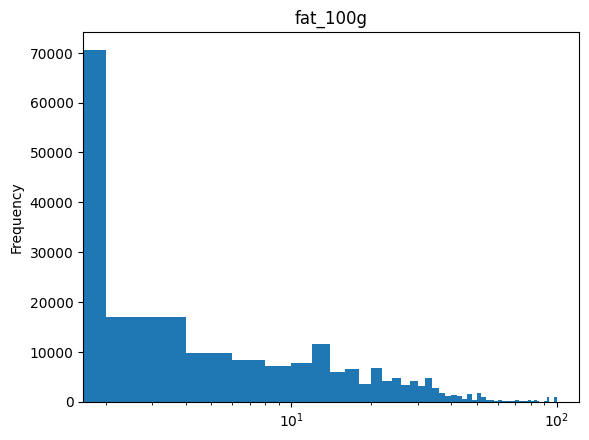

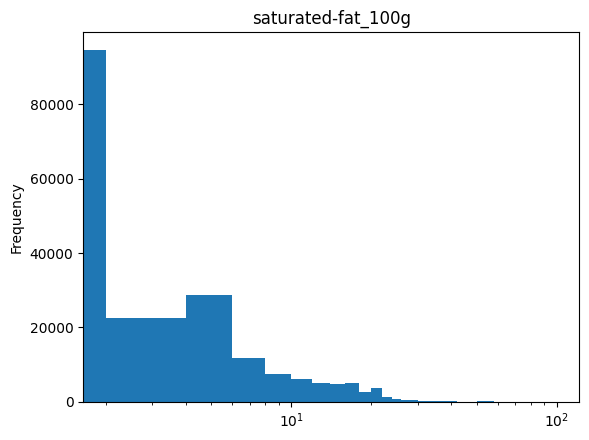

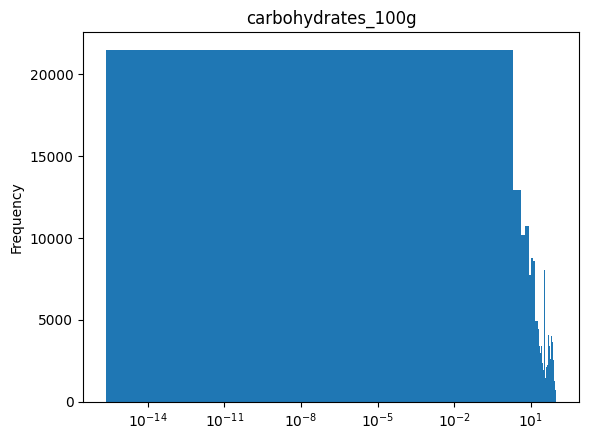

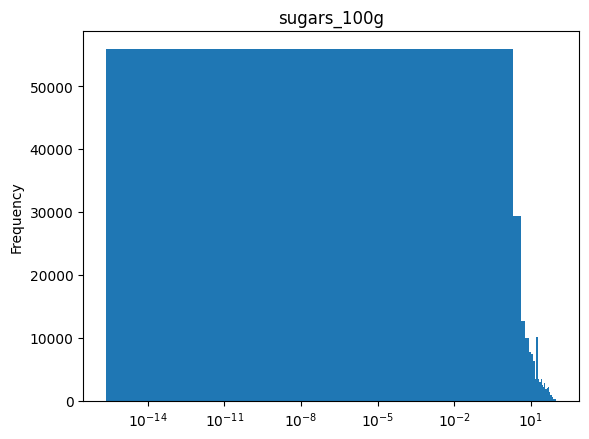

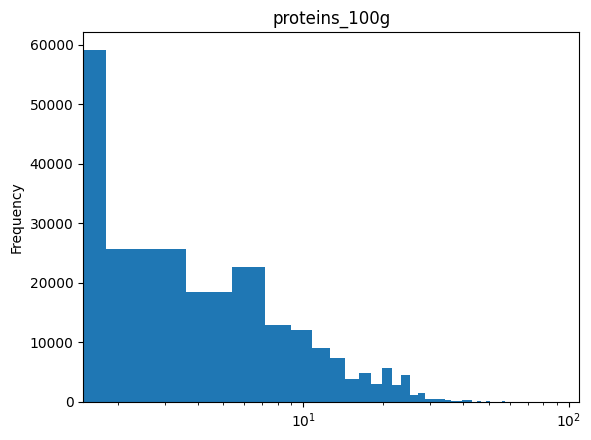

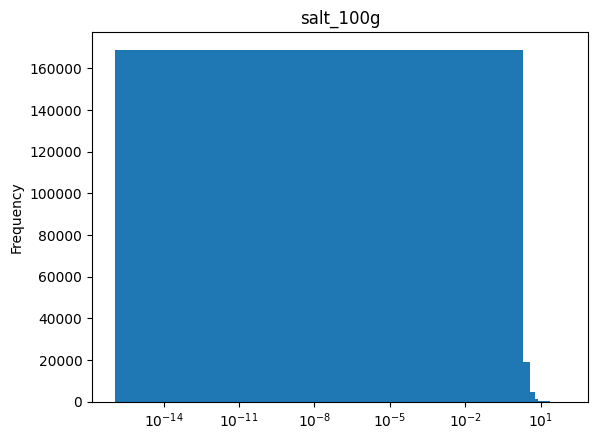

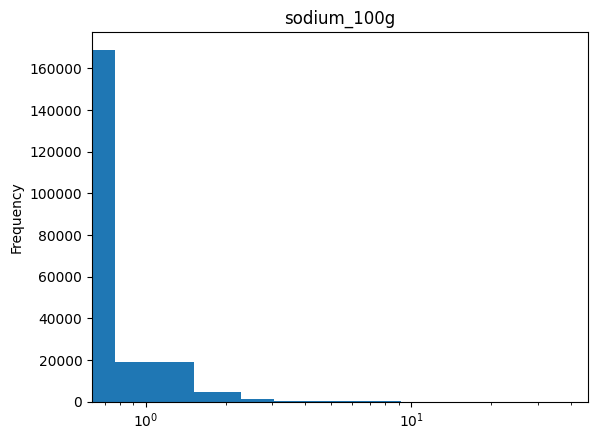

In [7]:
for col in ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g','sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g']:
   # Tracer un histogramme avec une échelle logarithmique
   data[col].plot.hist(bins=50, logx=True)
   plt.title(col)
   plt.show()


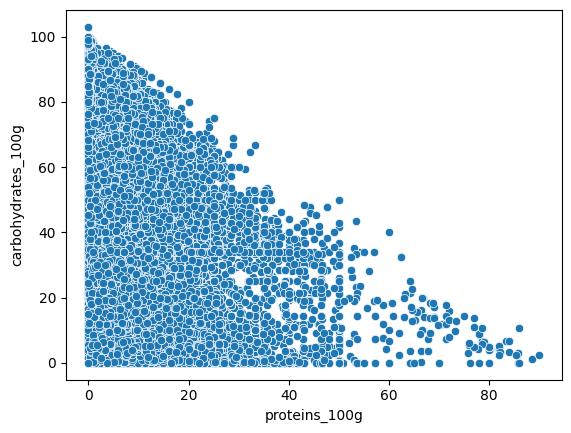

In [8]:
sns.scatterplot(x='proteins_100g', y='carbohydrates_100g', data=data)
plt.show()

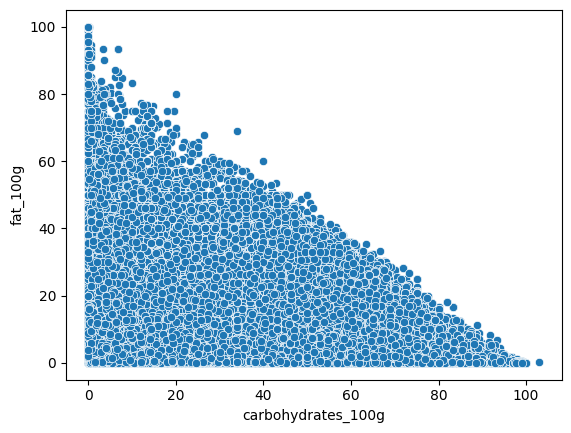

In [9]:
sns.scatterplot(x='carbohydrates_100g', y='fat_100g', data=data)
plt.show()

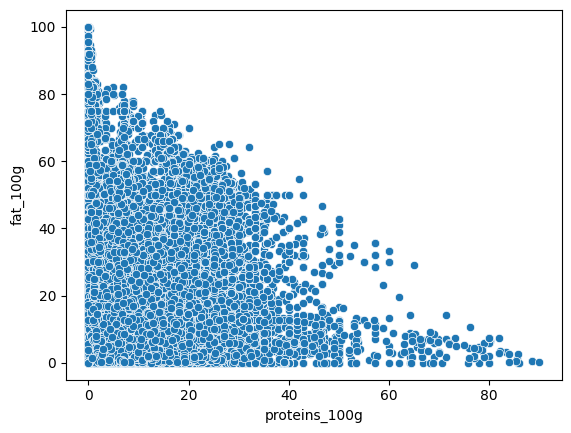

In [10]:
sns.scatterplot(x='proteins_100g', y='fat_100g', data=data)
plt.show()

In [11]:
data.columns

Index(['produit', 'code', 'pnns_groups_1', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [12]:
df=data.drop(labels = ['produit','pnns_groups_1'], axis = 1)

In [13]:
df.corr()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
energy_100g,1.000000,0.749854,0.517804,0.457955,0.277257,0.266798,-0.007157,-0.007155
fat_100g,0.749854,1.000000,0.683419,-0.128867,-0.056740,0.216783,-0.009293,-0.009290
saturated-fat_100g,0.517804,0.683419,1.000000,-0.071614,0.085992,0.158951,-0.007204,-0.007208
carbohydrates_100g,0.457955,-0.128867,-0.071614,1.000000,0.650792,-0.131767,-0.034582,-0.034586
sugars_100g,0.277257,-0.056740,0.085992,0.650792,1.000000,-0.283165,-0.095914,-0.095918
proteins_100g,0.266798,0.216783,0.158951,-0.131767,-0.283165,1.000000,0.100435,0.100446
salt_100g,-0.007157,-0.009293,-0.007204,-0.034582,-0.095914,0.100435,1.000000,0.999998
sodium_100g,-0.007155,-0.009290,-0.007208,-0.034586,-0.095918,0.100446,0.999998,1.000000


<AxesSubplot: >

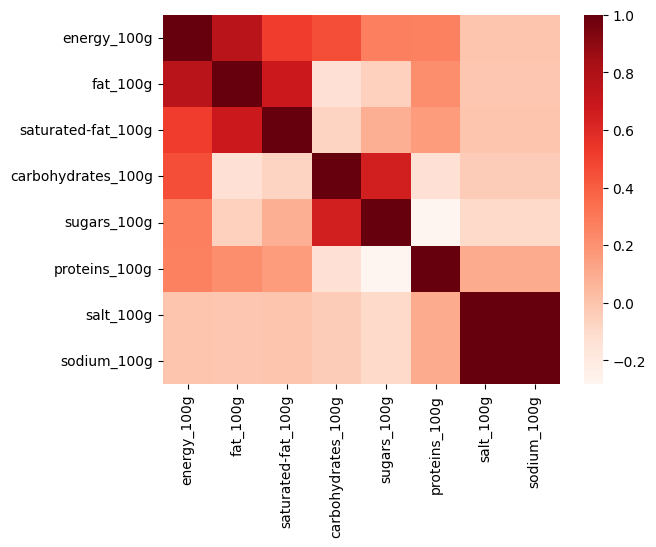

In [14]:
sns.heatmap(df.corr(), cmap="Reds")

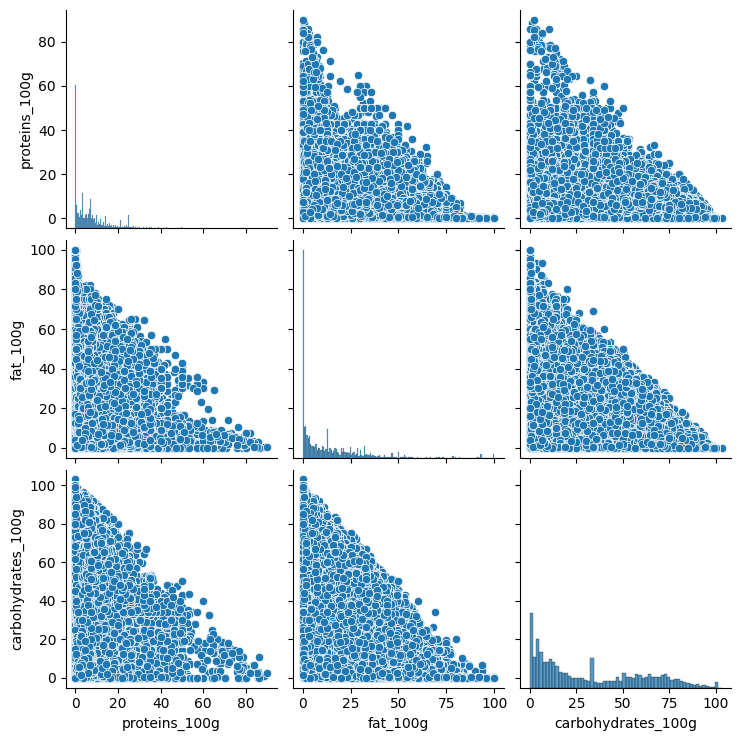

In [15]:
df = data[['proteins_100g', 'fat_100g', 'carbohydrates_100g']]

# Tracer un pairplot des colonnes sélectionnées
sns.pairplot(df)
plt.show()

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes quantitatives
X = data.iloc[:, 3:]

# Normalisation des données
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled = scaler.fit_transform(X)

In [17]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7
mean,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [18]:
n_components = 6

pca = PCA(n_components=n_components)

pca.fit(X_scaled)

PCA(n_components=6)

In [19]:
pca.explained_variance_ratio_

array([0.30481947, 0.26462602, 0.22108539, 0.11147669, 0.05805877,
       0.03419776])

In [20]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([30.48, 26.46, 22.11, 11.15,  5.81,  3.42])

In [21]:
scree_cum = scree.cumsum().round()
scree_cum

array([30., 57., 79., 90., 96., 99.])

In [22]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5, 6]

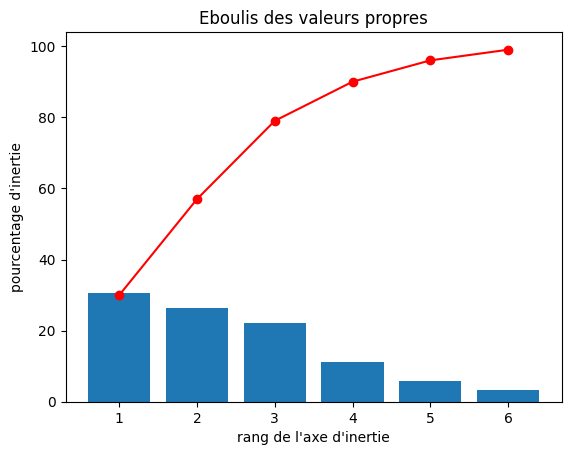

In [23]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [24]:
pcs = pca.components_
pcs

array([[ 0.59073839,  0.55224495,  0.49815327,  0.17303434,  0.1665686 ,
         0.19428427, -0.03510454, -0.03510415],
       [-0.02678316,  0.13086492,  0.08983113, -0.30332285, -0.35045557,
         0.26208165,  0.58761119,  0.58761368],
       [ 0.1302437 , -0.20768336, -0.14633086,  0.56049143,  0.50809109,
        -0.22652768,  0.38397412,  0.38397053],
       [ 0.16966638, -0.21933509, -0.36408175,  0.3076456 , -0.09577751,
         0.82164267, -0.07627463, -0.07626459],
       [-0.39043154, -0.31623167,  0.56387748, -0.18680254,  0.50400829,
         0.37507055,  0.00165611,  0.00165358],
       [-0.03447374, -0.37534168,  0.51983345,  0.49607795, -0.5720588 ,
        -0.11794147, -0.01497017, -0.01498257]])

In [25]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7
0,0.590738,0.552245,0.498153,0.173034,0.166569,0.194284,-0.035105,-0.035104
1,-0.026783,0.130865,0.089831,-0.303323,-0.350456,0.262082,0.587611,0.587614
2,0.130244,-0.207683,-0.146331,0.560491,0.508091,-0.226528,0.383974,0.383971
3,0.169666,-0.219335,-0.364082,0.307646,-0.095778,0.821643,-0.076275,-0.076265
4,-0.390432,-0.316232,0.563877,-0.186803,0.504008,0.375071,0.001656,0.001654
5,-0.034474,-0.375342,0.519833,0.496078,-0.572059,-0.117941,-0.014970,-0.014983


In [26]:
pcs.columns

RangeIndex(start=0, stop=8, step=1)

In [27]:
features = X.columns

In [28]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
F1,0.59,0.55,0.50,0.17,0.17,0.19,-0.04,-0.04
F2,-0.03,0.13,0.09,-0.30,-0.35,0.26,0.59,0.59
F3,0.13,-0.21,-0.15,0.56,0.51,-0.23,0.38,0.38
F4,0.17,-0.22,-0.36,0.31,-0.10,0.82,-0.08,-0.08
F5,-0.39,-0.32,0.56,-0.19,0.50,0.38,0.00,0.00
F6,-0.03,-0.38,0.52,0.50,-0.57,-0.12,-0.01,-0.01


In [29]:
pcs.T

,F1,F2,F3,F4,F5,F6
energy_100g,0.590738,-0.026783,0.130244,0.169666,-0.390432,-0.034474
fat_100g,0.552245,0.130865,-0.207683,-0.219335,-0.316232,-0.375342
saturated-fat_100g,0.498153,0.089831,-0.146331,-0.364082,0.563877,0.519833
carbohydrates_100g,0.173034,-0.303323,0.560491,0.307646,-0.186803,0.496078
sugars_100g,0.166569,-0.350456,0.508091,-0.095778,0.504008,-0.572059
proteins_100g,0.194284,0.262082,-0.226528,0.821643,0.375071,-0.117941
salt_100g,-0.035105,0.587611,0.383974,-0.076275,0.001656,-0.014970
sodium_100g,-0.035104,0.587614,0.383971,-0.076265,0.001654,-0.014983


<AxesSubplot: >

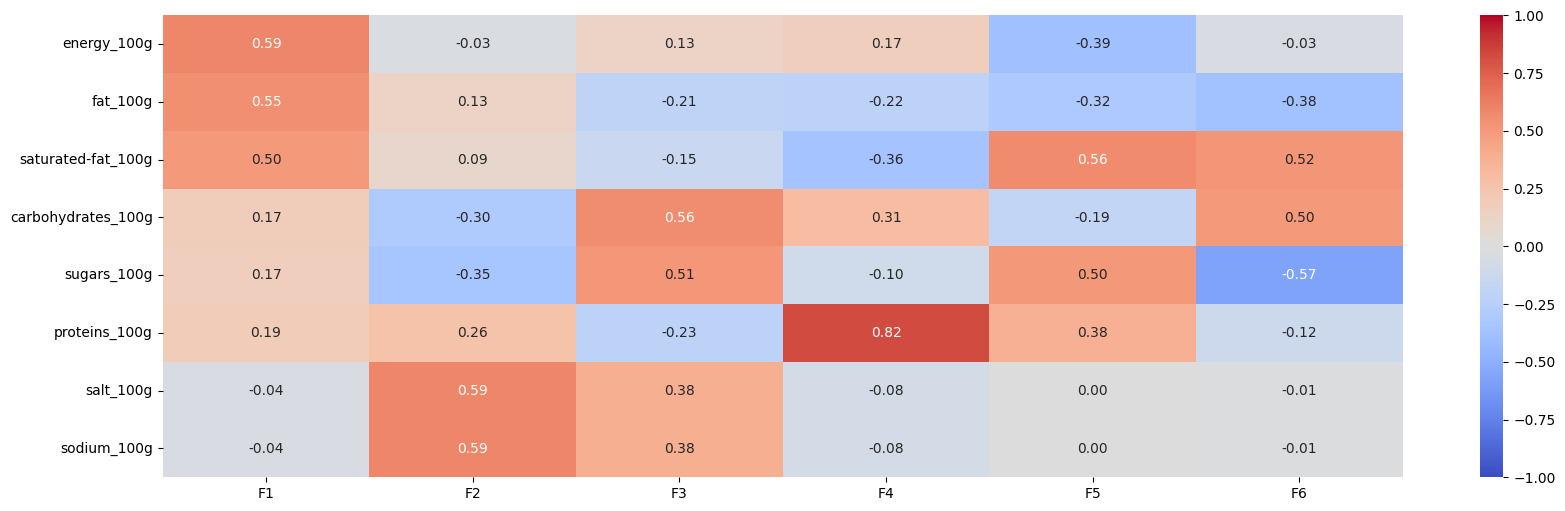

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [31]:
x, y = 0,1

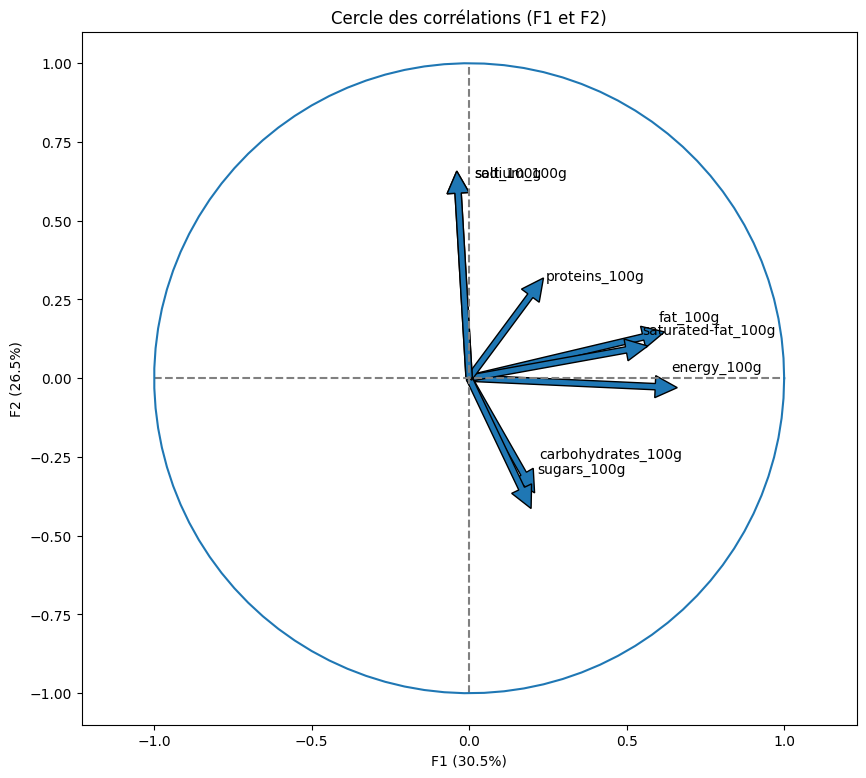

In [32]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

In [33]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour échelle

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [34]:
x_y = (0,1)

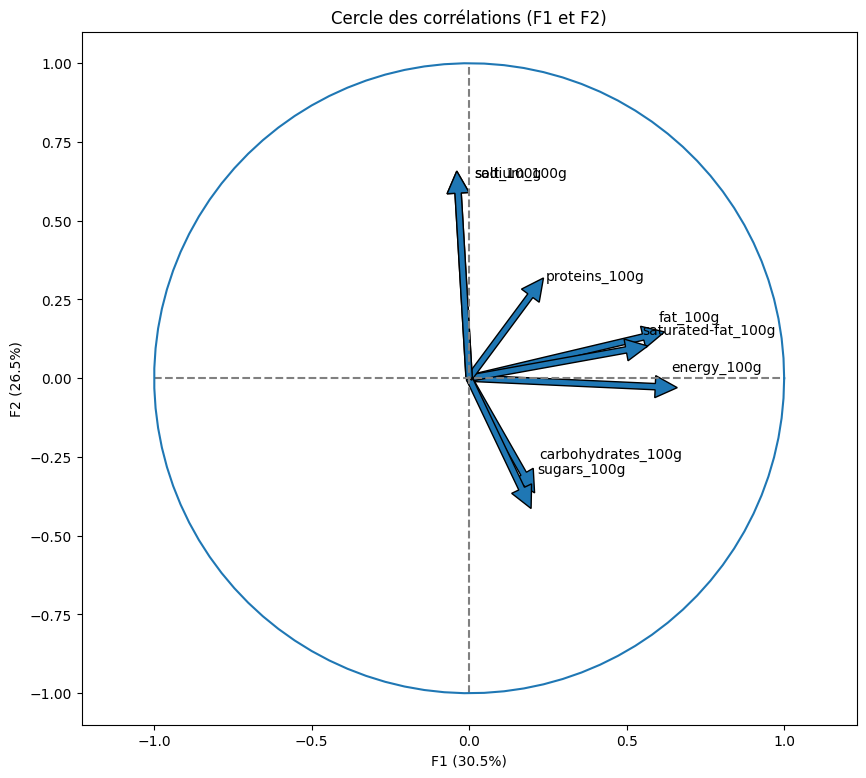

In [35]:
correlation_graph(pca, x_y, features)

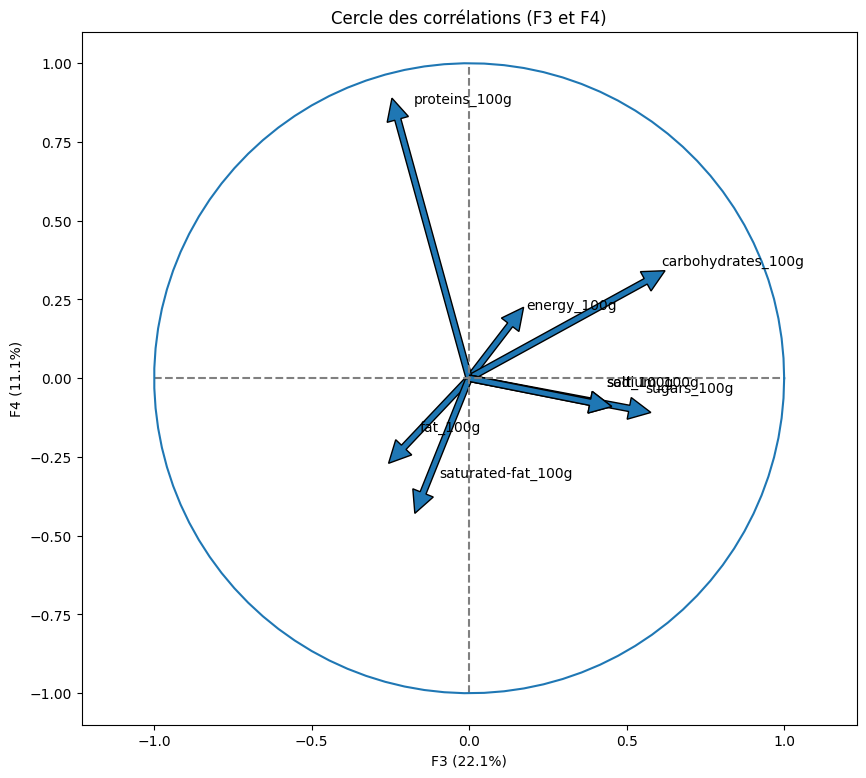

In [36]:
correlation_graph(pca, (2,3), features)

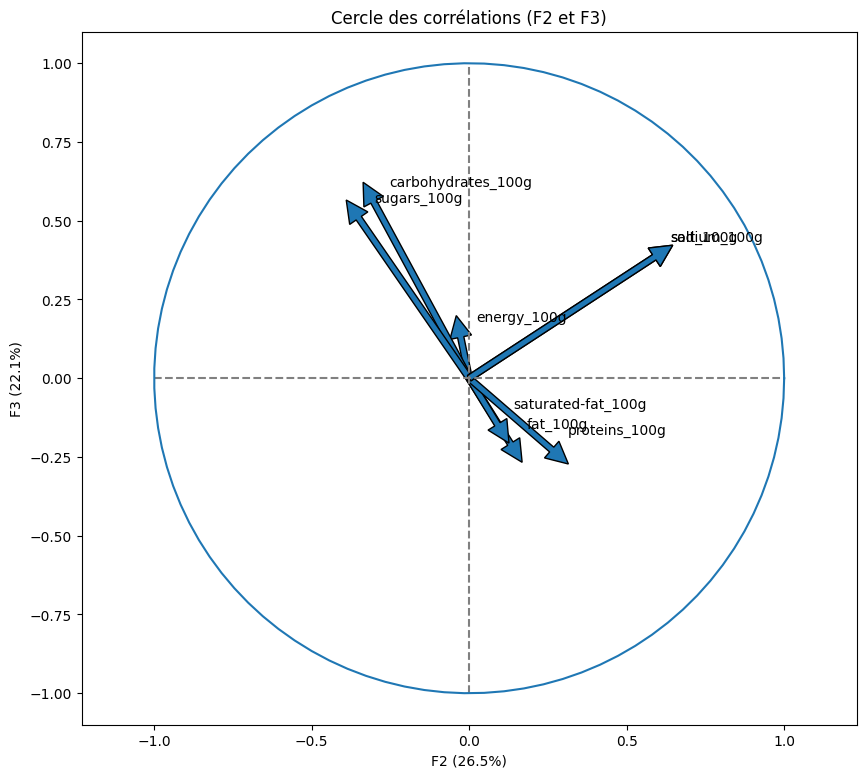

In [37]:
correlation_graph(pca, (1,2), features)

In [38]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[ 3.55852343, -0.0061435 , -0.84852527, -1.00186694,  0.94969973,
         0.54135173],
       [ 3.33555989, -0.78723083,  0.47939586, -0.81419363,  1.0188091 ,
        -0.01494575],
       [ 0.29534343, -0.38698997,  0.3194655 ,  0.68763469, -1.16097996,
         0.68251595],
       [ 0.69493356, -0.79175175,  1.06787197,  0.60513892, -0.40422753,
         0.68620618],
       [ 0.69493356, -0.79175175,  1.06787197,  0.60513892, -0.40422753,
         0.68620618]])

In [39]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

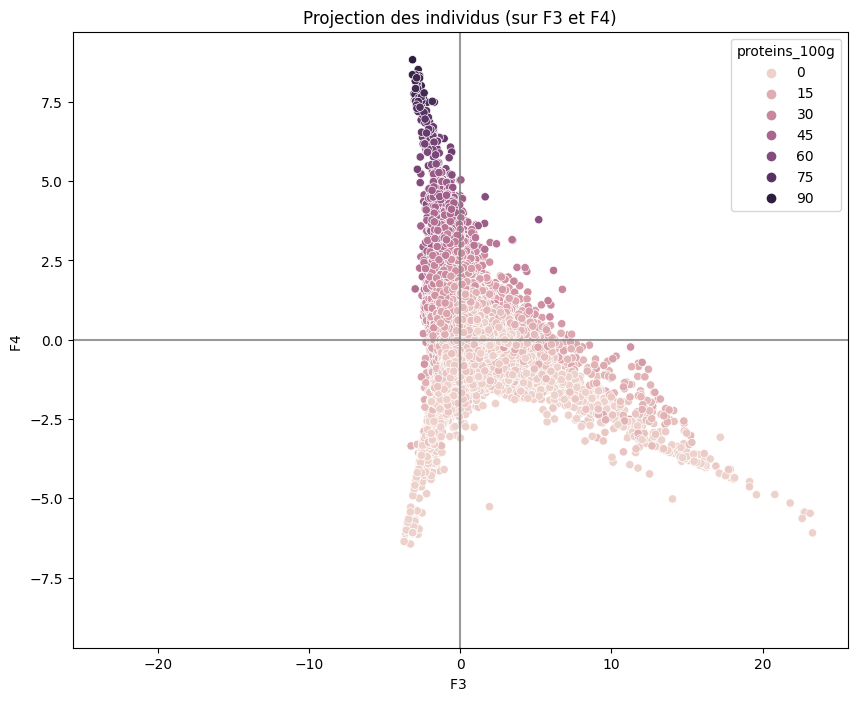

In [40]:
x_y = [2,3]
display_factorial_planes(X_proj, x_y, clusters=df['proteins_100g'])

In [41]:
# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 20)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

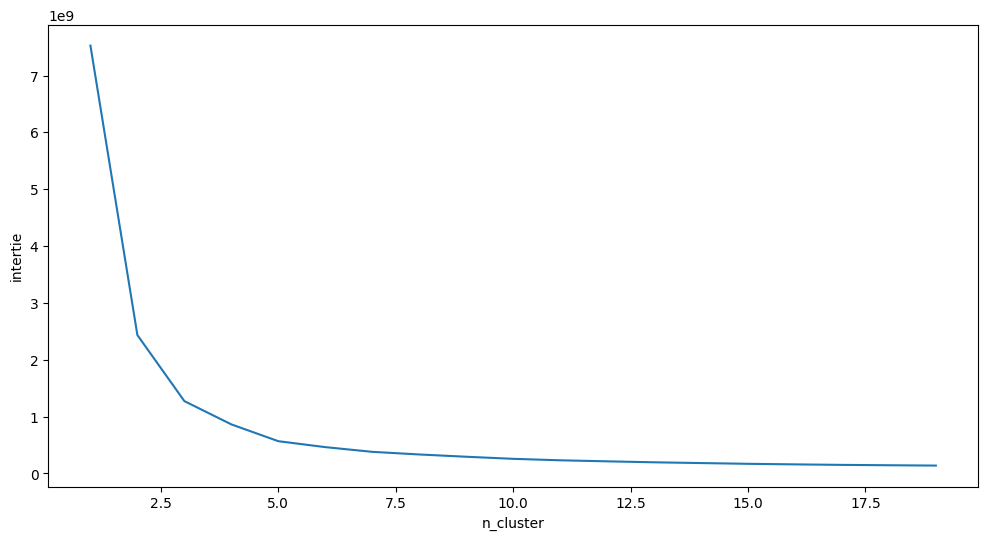

In [42]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertie")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [43]:
x_proj = pd.DataFrame(X_proj[:,:4], columns = ['F1', 'F2','F3','F4'])

In [44]:
x_proj

,F1,F2,F3,F4
0,3.558523,-0.006143,-0.848525,-1.001867
1,3.335560,-0.787231,0.479396,-0.814194
2,0.295343,-0.386990,0.319465,0.687635
3,0.694934,-0.791752,1.067872,0.605139
4,0.694934,-0.791752,1.067872,0.605139
...,...,...,...,...
196925,-0.195737,0.327447,-0.566741,-0.437775
196926,-1.204259,-0.516887,-0.232892,-0.021955
196927,-0.156854,-0.687622,0.343181,1.453984
196928,-0.181090,5.308011,3.609132,0.474930


In [45]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(x_proj)

KMeans(n_clusters=5)

In [46]:
dd = {i:j for i,j in enumerate(list("abcde"))}
dd

{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}

In [47]:
labels = [dd[i] for i in kmeans.labels_]
labels[:10]

['b', 'b', 'e', 'a', 'a', 'a', 'a', 'a', 'e', 'a']

In [48]:
x_proj["cluster"] = labels
x_proj

,F1,F2,F3,F4,cluster
0,3.558523,-0.006143,-0.848525,-1.001867,b
1,3.335560,-0.787231,0.479396,-0.814194,b
2,0.295343,-0.386990,0.319465,0.687635,e
3,0.694934,-0.791752,1.067872,0.605139,a
4,0.694934,-0.791752,1.067872,0.605139,a
...,...,...,...,...,...
196925,-0.195737,0.327447,-0.566741,-0.437775,d
196926,-1.204259,-0.516887,-0.232892,-0.021955,d
196927,-0.156854,-0.687622,0.343181,1.453984,e
196928,-0.181090,5.308011,3.609132,0.474930,e


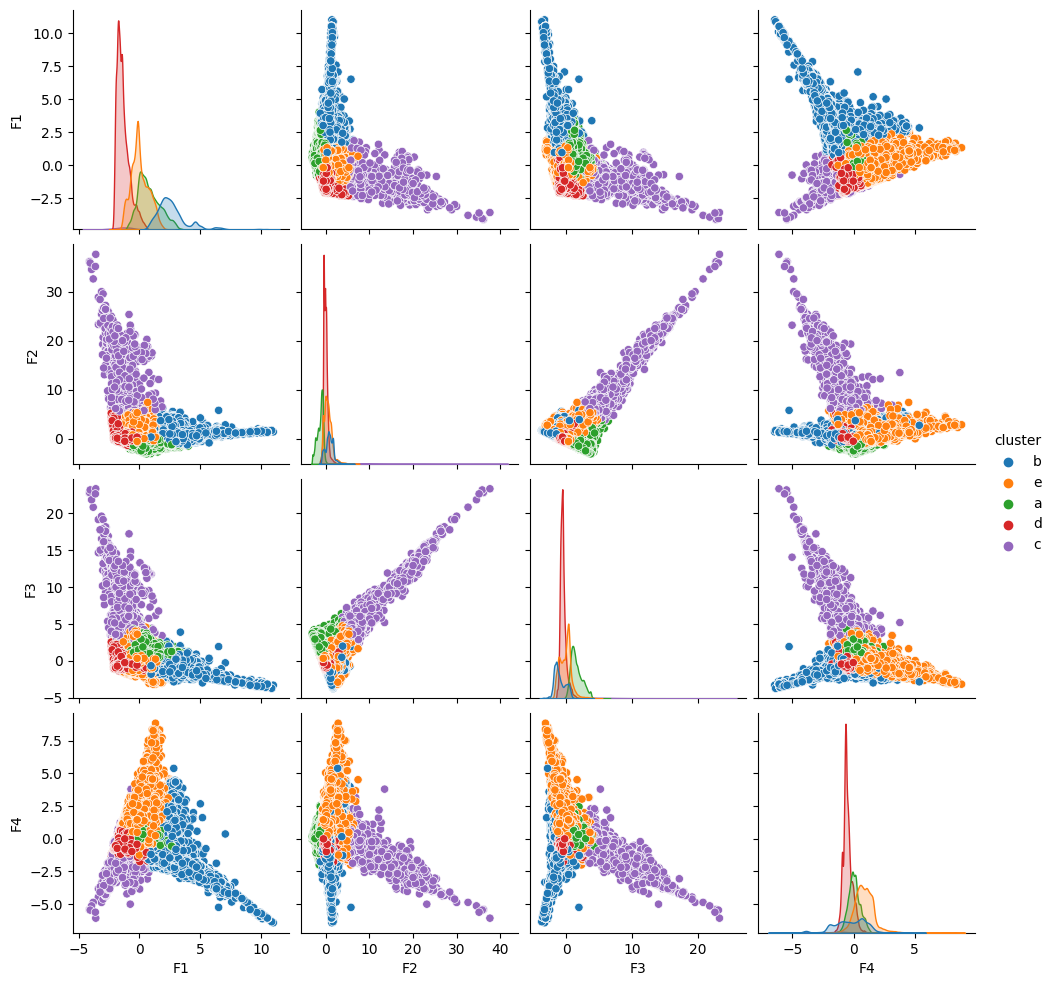

In [49]:
sns.pairplot(x_proj, hue="cluster")

In [50]:
x_proj['group']=data['pnns_groups_1']

In [51]:
x_proj

,F1,F2,F3,F4,cluster,group
0,3.558523,-0.006143,-0.848525,-1.001867,b,Sugary snacks
1,3.335560,-0.787231,0.479396,-0.814194,b,Sugary snacks
2,0.295343,-0.386990,0.319465,0.687635,e,Sugary snacks
3,0.694934,-0.791752,1.067872,0.605139,a,Sugary snacks
4,0.694934,-0.791752,1.067872,0.605139,a,Sugary snacks
...,...,...,...,...,...,...
196925,-0.195737,0.327447,-0.566741,-0.437775,d,Fruits and vegetables
196926,-1.204259,-0.516887,-0.232892,-0.021955,d,Composite foods
196927,-0.156854,-0.687622,0.343181,1.453984,e,Cereals and potatoes
196928,-0.181090,5.308011,3.609132,0.474930,e,Fat and sauces


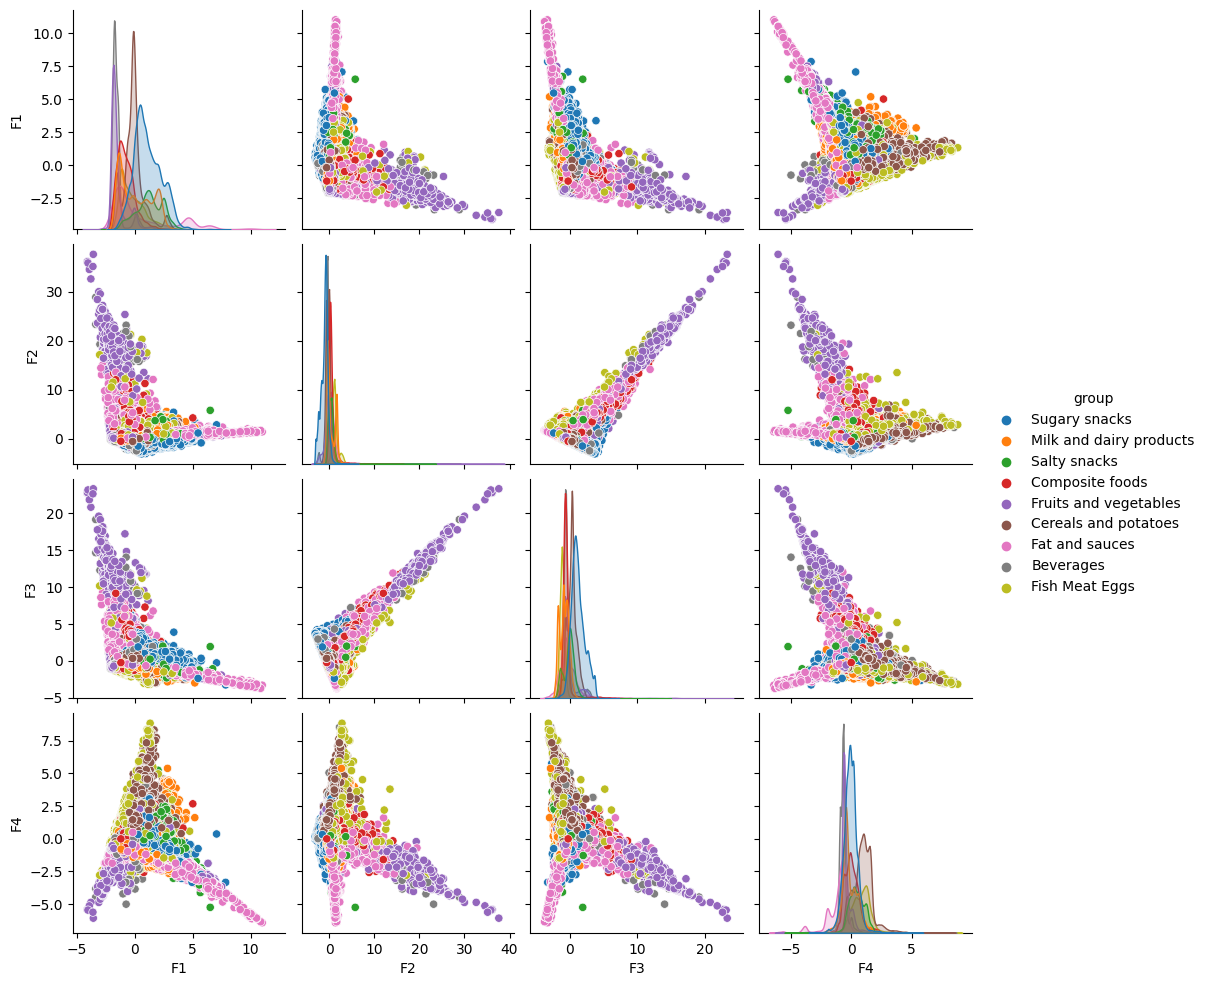

In [52]:
sns.pairplot(x_proj, hue="group")

# ANOVA

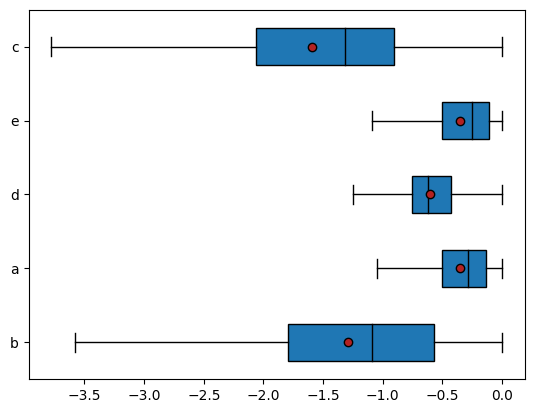

In [53]:
X = "cluster" # qualitative
Y = "F4" # quantitative

sous_echantillon = x_proj[x_proj[Y] < 0].copy()

modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
    groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

In [57]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.2903579489007745

In [64]:
rp.summary_cont(x_proj['F4'].groupby(x_proj['cluster']))

,N,Mean,SD,SE,95% Conf.,Interval
cluster,,,,,,
a,41158,0.0381,0.4875,0.0024,0.0334,0.0428
b,26361,-0.3221,1.3690,0.0084,-0.3386,-0.3056
c,1390,-1.3489,1.2109,0.0325,-1.4126,-1.2852
d,73964,-0.5180,0.3665,0.0013,-0.5207,-0.5154
e,54057,0.8715,0.8411,0.0036,0.8644,0.8786


In [66]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('F4 ~ C(cluster)', data=x_proj).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(cluster),66231.238838,4.0,29806.559684,0.0
Residual,109393.593612,196925.0,NaN,NaN


In [68]:
def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(cluster),66231.238838,4.0,16557.809709,29806.559684,0.0,0.377118,0.377104
Residual,109393.593612,196925.0,0.555509,NaN,NaN,NaN,NaN


In [54]:
pd.crosstab(x_proj['group'], x_proj['cluster'])

cluster,a,b,c,d,e
group,,,,,
Beverages,1360,45,24,16436,252
Cereals and potatoes,4400,1381,25,5423,20005
Composite foods,4,202,374,12131,7778
Fat and sauces,286,5120,461,8865,1340
Fish Meat Eggs,0,1859,56,1583,11658
Fruits and vegetables,2043,283,434,13541,495
Milk and dairy products,834,6715,0,12704,2682
Salty snacks,387,5116,1,1420,6864
Sugary snacks,31844,5640,15,1861,2983
